<a href="https://colab.research.google.com/github/roshanJayasekara/Whataspp_analysis/blob/main/whatsapp_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Whataspp Group chat analysis



## importing packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data and Info of the data file

In [ ]:
chat=pd.read_csv("/content/drive/My Drive/Whatsapp/WhatsApp Chat with TLM FAMILY 🥳❤️😘.txt",
                 error_bad_lines=False, delimiter = "\t", header = None, names = ['text']
                 )

In [ ]:
chat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43583 entries, 0 to 43582
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    43583 non-null  object
dtypes: object(1)
memory usage: 340.6+ KB


## Data preprocessing

In [ ]:
chat[['datetime_str','text_2']] = chat["text"].str.split(" - ", 1, expand=True)
chat["datetime"] = pd.to_datetime(chat["datetime_str"],errors='coerce')
chat.drop(["text","datetime_str"],axis=1,inplace=True)
chat.head()

,text_2,datetime
0,Gayasha Tlm: Puchchala ewarai,2020-03-31 21:39:00
1,Ovini: Eka hondai ehenam,2020-03-31 21:44:00
2,Ovini: Rauf Hakeem ehemath objections dala thbune,2020-03-31 21:45:00
3,Buddhi: News wala pennuwa,2020-03-31 21:50:00
4,Buddhi: ⭕ *රතු නිවේදනයකි.*⭕,2020-03-31 21:54:00


In [ ]:
chat.shape

(43583, 2)

In [ ]:
chat.dropna(subset=['datetime'],inplace=True)

In [ ]:
chat.shape

(40003, 2)

In [ ]:
chat[['sender','text_message']] = chat['text_2'].str.split(': ', 1, expand=True)
chat.dropna(subset=['text_message'],inplace=True)
chat.drop(columns = ['text_2'],inplace=True)

In [ ]:
chat.head()

,datetime,sender,text_message
0,2020-03-31 21:39:00,Gayasha Tlm,Puchchala ewarai
1,2020-03-31 21:44:00,Ovini,Eka hondai ehenam
2,2020-03-31 21:45:00,Ovini,Rauf Hakeem ehemath objections dala thbune
3,2020-03-31 21:50:00,Buddhi,News wala pennuwa
4,2020-03-31 21:54:00,Buddhi,⭕ *රතු නිවේදනයකි.*⭕


In [ ]:
chat['datetime'].dt.dayofweek

0        1
1        1
2        1
3        1
4        1
        ..
43578    3
43579    3
43580    3
43581    3
43582    3
Name: datetime, Length: 39958, dtype: int64

## Frequencey of Massages with Respect to day of the week and Time

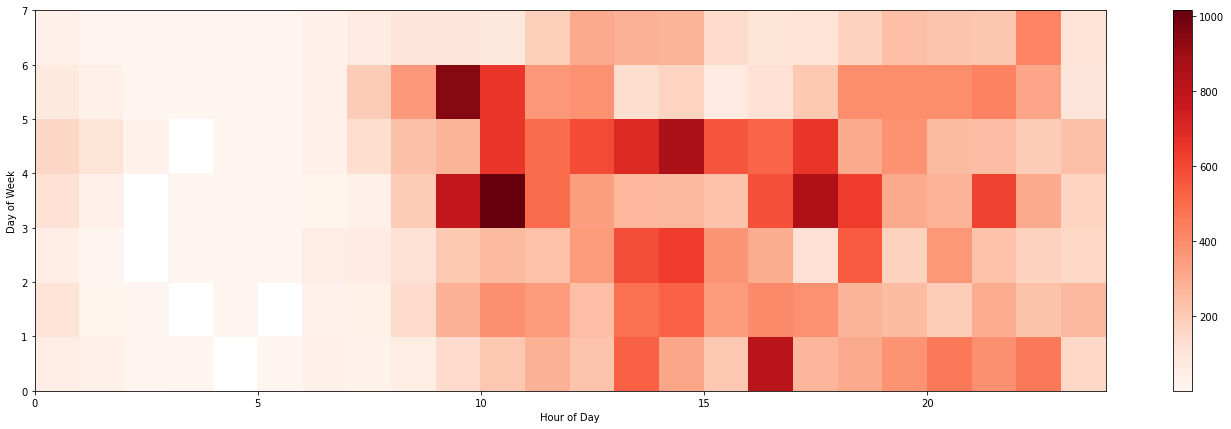

In [ ]:
# Create new fields to use in heatmap
chat['day_of_week'] = chat['datetime'].dt.dayofweek + 1
chat['hour_of_day'] = chat['datetime'].dt.hour

# Create new chatframe containing chat counts
heatmap_chat = chat.groupby(['day_of_week', 'hour_of_day']).size()
heatmap_chat = heatmap_chat.unstack()

# Create heatmap
plt.figure(figsize=(24,7))
plt.pcolor(heatmap_chat, cmap='Reds')
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.colorbar()
plt.show()

## Massage count vs Users

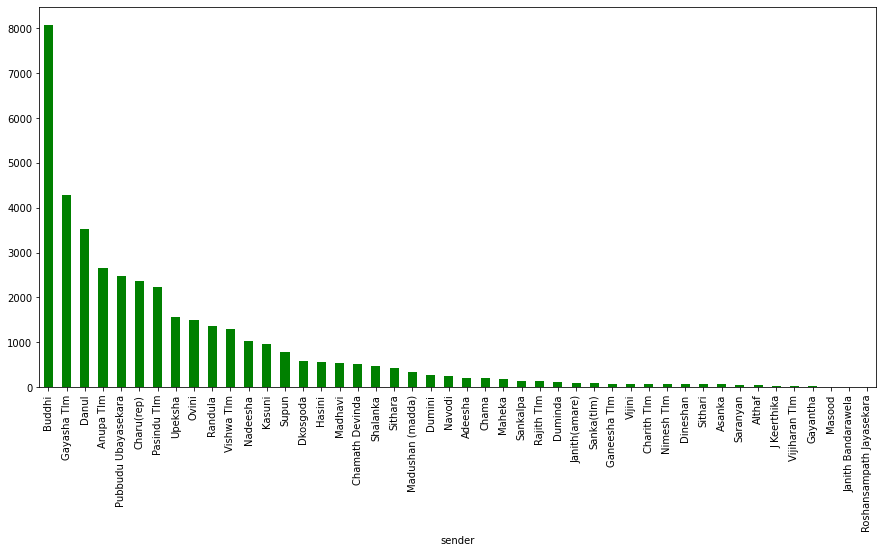

In [ ]:
sender_count_series = chat.groupby(['sender']).size().sort_values(ascending=False)
sender_count_series.plot(kind="bar",figsize=(15,7),color=["g"])

In [ ]:
chat.head()

,datetime,sender,text_message,day_of_week,hour_of_day
0,2020-03-31 21:39:00,Gayasha Tlm,Puchchala ewarai,2,21
1,2020-03-31 21:44:00,Ovini,Eka hondai ehenam,2,21
2,2020-03-31 21:45:00,Ovini,Rauf Hakeem ehemath objections dala thbune,2,21
3,2020-03-31 21:50:00,Buddhi,News wala pennuwa,2,21
4,2020-03-31 21:54:00,Buddhi,⭕ *රතු නිවේදනයකි.*⭕,2,21


## Most used Words

In [ ]:
## Create chatFrame with all words used split by sender
# Filter out 'Media Omitted' messages
chat_texts = chat[~chat['text_message'].str.contains('omitted')]

# Create empty chatFrame to use for the word count
words = pd.DataFrame(columns=['sender','words'])

# Loop through all messages in the chatFrame
for sender, message in zip(chat_texts.sender, chat_texts.text_message):
 
  # Split out each word in each message
  message_split = message.split()
  for word in message_split:
 
    # Add each word to the chatFrame
    words = words.append({'sender' : sender , 'words' : word.lower()}, ignore_index=True)

# Remove punctuation from the start and end of words
words['words'] = words['words'].str.replace('(^\W)|(\W$)','')

# Create list of 'non-words' that we don't care about
non_words = ['the','to','a','i','you','it','and','for','be','that','in','of','have','on','at','is','as','or','we','if','so','']

# Filter out this list of 'non-words' from each set of words
words_filtered = words[~words['words'].isin(non_words)]

# Create word counts as a series
word_count_total_series = words_filtered.groupby(['words']).size().sort_values(ascending=False)

# Create word counts series as a chatFrame
word_count_total = pd.DataFrame(word_count_total_series)

# Reset index in order to name columns correctly
word_count_total = word_count_total.reset_index()
word_count_total.columns = ['words', 'count']

# Display top 10 words used
word_count_total.head(10)

,words,count
0,eka,2137
1,na,2107
2,ne,932
3,eke,919
4,happy,887
5,me,839
6,ow,819
7,ekak,815
8,birthday,812
9,wage,573
